In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_excel('weather_dataset_stage1.xls',header=28)

In [4]:
data = df.copy()

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
data.head()

,Date,Temperature,Average humidity (%,Average dewpoint (°F,Average barometer (in,Average windspeed (mph,Average gustspeed (mph,Average direction (°deg,Rainfall for month (in,Rainfall for year (in,Maximum rain per minute,Maximum temperature (°F,Minimum temperature (°F,Maximum humidity (%,Minimum humidity (%,Maximum pressure,Minimum pressure,Maximum windspeed (mph,Maximum gust speed (mph,Maximum heat index (°F,Date1,Month,diff_pressure
0,2022-01-01,'37.8','35.0','12.7','29.7','26.4','36.8','274.0','0.0','0.0','0.0','40.0','34.0','4.0','27.0','29.762','29.596','41.4','59.0','40.0','2022-01-01','01','0.16600000000000037'
1,2022-01-02','43.2','32.0','14.7','29.5','12.8','18.0','240.0','0.0','0.0','0.0','52.0','37.0','4.0','16.0','29.669','29.268','35.7','51.0','52.0','2022-01-02','01','0.4009999999999998'
2,2022-01-03','25.7','60.0','12.7','29.7','8.3','12.2','290.0','0.0','0.0','0.0','41.0','6.0','8.0','35.0','30.232','29.26','25.3','38.0','41.0','2022-01-03','01','0.9719999999999978'
3,2022-01-04','9.3','67.0','0.1','30.4','2.9','4.5','47.0','0.0','0.0','0.0','19.0','-0.0','7.0','35.0','30.566','30.227','12.7','20.0','32.0','2022-01-04','01','0.33899999999999864'
4,2022-01-05','23.5','30.0','-5.3','29.9','16.7','23.1','265.0','0.0','0.0','0.0','30.0','15.0','5.0','13.0','30.233','29.568','38.0','53.0','32.0','2022-01-05','01','0.6649999999999991'


In [7]:
data.columns

Index(['Date', ' Temperature', ' Average humidity (%', ' Average dewpoint (°F',
       ' Average barometer (in', ' Average windspeed (mph',
       ' Average gustspeed (mph', ' Average direction (°deg',
       ' Rainfall for month (in', 'Rainfall for year (in',
       ' Maximum rain per minute', ' Maximum temperature (°F',
       ' Minimum temperature (°F', ' Maximum humidity (%',
       ' Minimum humidity (%', ' Maximum pressure', ' Minimum pressure',
       ' Maximum windspeed (mph', ' Maximum gust speed (mph',
       ' Maximum heat index (°F', 'Date1', ' Month', ' diff_pressure'],
      dtype='object')

`Observations`
- most of columns names have space on left side
- column names have more unnecessory information

In [8]:
# removing extra spaces
data.columns = data.columns.str.strip()

In [9]:
data.columns

Index(['Date', 'Temperature', 'Average humidity (%', 'Average dewpoint (°F',
       'Average barometer (in', 'Average windspeed (mph',
       'Average gustspeed (mph', 'Average direction (°deg',
       'Rainfall for month (in', 'Rainfall for year (in',
       'Maximum rain per minute', 'Maximum temperature (°F',
       'Minimum temperature (°F', 'Maximum humidity (%', 'Minimum humidity (%',
       'Maximum pressure', 'Minimum pressure', 'Maximum windspeed (mph',
       'Maximum gust speed (mph', 'Maximum heat index (°F', 'Date1', 'Month',
       'diff_pressure'],
      dtype='object')

In [10]:
# renaming columns.
data.rename(columns = {'Date':'date', 'Temperature':'temp', 'Average humidity (%':'avg_humidity', 'Average dewpoint (°F':'avg_dewpoint',
       'Average barometer (in':'avg_barometer', 'Average windspeed (mph':'avg_windspeed',
       'Average gustspeed (mph':'avg_gustspeed', 'Average direction (°deg':'avg_direction',
       'Rainfall for month (in':'rainfall_month', 'Rainfall for year (in':'rainfall_year',
       'Maximum rain per minute':'max_rain_per_minute', 'Maximum temperature (°F':'max_temp',
       'Minimum temperature (°F':'min_temp', 'Maximum humidity (%':'max_humidity', 'Minimum humidity (%':'min_humidity',
       'Maximum pressure':'max_pressure', 'Minimum pressure':'min_pressure', 'Maximum windspeed (mph':'max_windspeed',
       'Maximum gust speed (mph':'max_gustspeed', 'Maximum heat index (°F':'max_heat_index', 'Date1':'date1', 'Month':'month',
       'diff_pressure':'diff_pressure'},inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 3903 non-null   object
 1   temp                 3903 non-null   object
 2   avg_humidity         3903 non-null   object
 3   avg_dewpoint         3903 non-null   object
 4   avg_barometer        3903 non-null   object
 5   avg_windspeed        3903 non-null   object
 6   avg_gustspeed        3903 non-null   object
 7   avg_direction        3903 non-null   object
 8   rainfall_month       3903 non-null   object
 9   rainfall_year        3903 non-null   object
 10  max_rain_per_minute  3903 non-null   object
 11  max_temp             3903 non-null   object
 12  min_temp             3903 non-null   object
 13  max_humidity         3903 non-null   object
 14  min_humidity         3903 non-null   object
 15  max_pressure         3903 non-null   object
 16  min_pr

`Observations`
- `date` and `date1` have wrong datatype --> assign `datetime` datatype
- remaining columns have 'string' datatype --> assign `float` datatype

In [12]:
# convert column to datetime
data['date']= pd.to_datetime(data['date'])

ParserError: day is out of range for month: 2022-02-29'

`Observations`
- year 2022 have invalid date entry in feb month
- date have `'` at right side and spaces at left side

In [13]:
data['date'] = data['date'].str.strip(" ,'")

In [14]:
data[data['date'].str.contains('2022-02-29')]

,date,temp,avg_humidity,avg_dewpoint,avg_barometer,avg_windspeed,avg_gustspeed,avg_direction,rainfall_month,rainfall_year,max_rain_per_minute,max_temp,min_temp,max_humidity,min_humidity,max_pressure,min_pressure,max_windspeed,max_gustspeed,max_heat_index,date1,month,diff_pressure
2366,2022-02-29,'38.1','36.0','12.3','29.8','11.5','17.0','77.0','0.16','0.36','0.0','45.9','27.9','73.0','22.0','30.023','29.702','29.9','39.1','45.9','2022-02-29','02','0.32099999999999795'
3751,2022-02-29,'37.6','31.0','8.7','29.8','8.0','11.6','236.0','0.48','0.49','0.0','48.1','26.1','57.0','20.0','29.972','29.647','19.6','31.1','48.1','2022-02-29','02','0.32500000000000284'


In [15]:
data.drop([2366,3751],axis=0,inplace=True)

In [16]:
data['date']= pd.to_datetime(data['date'])

In [17]:
data['date1']= pd.to_datetime(data['date1'])

In [18]:
for col in data.select_dtypes(include=['object']).columns:
     data[col] = data[col].str.strip(" ',;").astype('float')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3901 entries, 0 to 3902
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 3901 non-null   datetime64[ns]
 1   temp                 3901 non-null   float64       
 2   avg_humidity         3901 non-null   float64       
 3   avg_dewpoint         3901 non-null   float64       
 4   avg_barometer        3901 non-null   float64       
 5   avg_windspeed        3901 non-null   float64       
 6   avg_gustspeed        3901 non-null   float64       
 7   avg_direction        3901 non-null   float64       
 8   rainfall_month       3901 non-null   float64       
 9   rainfall_year        3901 non-null   float64       
 10  max_rain_per_minute  3901 non-null   float64       
 11  max_temp             3901 non-null   float64       
 12  min_temp             3901 non-null   float64       
 13  max_humidity         3901 non-nul

`Observations`
- there is no missing values in dataset

In [20]:
#checking duplicates rows
data.duplicated().sum()

1

In [21]:
data[data.duplicated(keep=False)]

,date,temp,avg_humidity,avg_dewpoint,avg_barometer,avg_windspeed,avg_gustspeed,avg_direction,rainfall_month,rainfall_year,max_rain_per_minute,max_temp,min_temp,max_humidity,min_humidity,max_pressure,min_pressure,max_windspeed,max_gustspeed,max_heat_index,date1,month,diff_pressure
3901,2022-07-28,60.5,61.0,45.3,29.7,4.0,6.2,248.0,0.35,4.49,0.0,75.6,46.0,94.0,35.0,29.792,29.675,17.3,26.5,77.6,2022-07-28,7.0,0.117
3902,2022-07-28,60.5,61.0,45.3,29.7,4.0,6.2,248.0,0.35,4.49,0.0,75.6,46.0,94.0,35.0,29.792,29.675,17.3,26.5,77.6,2022-07-28,7.0,0.117


In [22]:
#dropping duplicate rows
data = data.drop_duplicates()

In [23]:
#checking duplicates columns
data.columns[data.T.duplicated(keep=False)]

Index(['date', 'date1'], dtype='object')

In [24]:
#dropping duplicate columns
data = data.T.drop_duplicates().T

In [25]:
data.columns[data.T.duplicated(keep=False)]

Index([], dtype='object')

In [26]:
data = data.reset_index()

In [27]:
data = data.drop('index',axis=1)

In [44]:
data.to_csv('weather_data.csv',encoding='utf-8',index=False)

### 1.Give the count of the minimum number of days for the time when temperature reduced

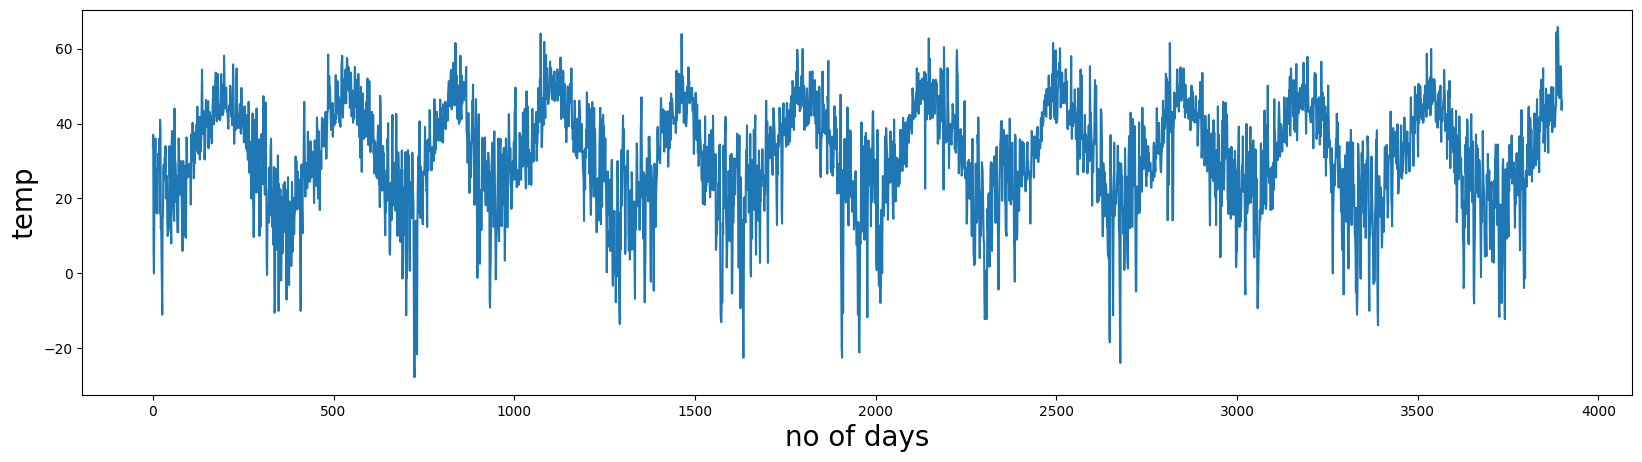

In [29]:
plt.figure(figsize=(20,5))
data['min_temp'].plot(kind='line')
plt.xlabel('no of days',fontsize=20)
plt.ylabel('temp',fontsize=20)
plt.show()

In [30]:
count = 0
for i in range(1, len(data)):
    if data['min_temp'][i] < data['min_temp'][i-1]:
        count += 1    
print(count)

2000


### 2.Find the temperature as Cold / hot by using the case and avg of values of the given data set

In [31]:
(data['temp'] < 68).sum()

3801

In [32]:
(data['temp'] > 68).sum()

91

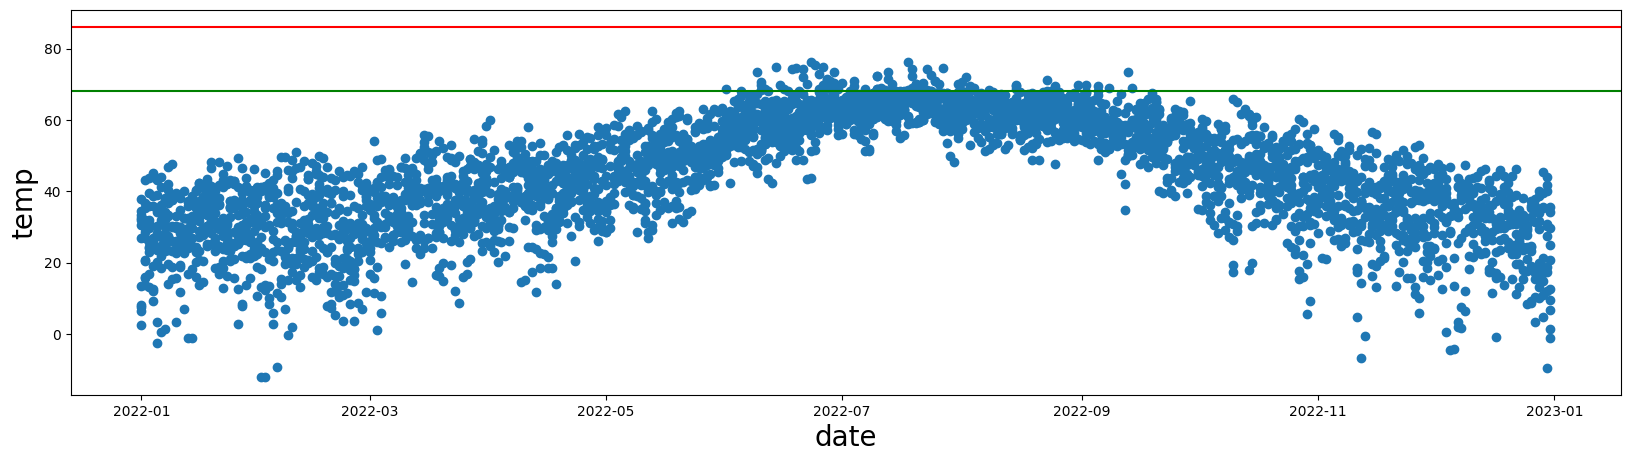

In [33]:
target_line_cold=68
target_line_hot=86
plt.figure(figsize=(20,5))
plt.scatter(x=data['date'],y = data['temp'])
plt.axhline(y=target_line_cold, color='g', linestyle='-')
plt.axhline(y=target_line_hot, color='r', linestyle='-')
plt.xlabel('date',fontsize=20)
plt.ylabel('temp',fontsize=20)
plt.show()

In [34]:
hot = 0
cold = 0
for i in range(1, len(data)):
    if data['temp'][i] < 68:
        cold += 1 
    elif data['temp'][i] > 68:
        hot += 1
    else:
        pass
print(cold)
print(hot)

3800
91


### 3.Can you check for all 4 consecutive days when the temperature was below 30 Fahrenheit

In [35]:
# checking temp below 30 fahrenheit 
df_cold = data[data['temp'] < 30]

In [36]:
# calculating consecutive days
df_cold['consecutive_days'] = (df_cold['date'] - df_cold['date'].shift(1)).dt.days.ne(1).cumsum()

In [37]:
# group by the consecutive days and count the number of days in each group
cold_groups = df_cold.groupby('consecutive_days').size()

In [38]:
# find the maximum number of consecutive days.
max_consecutive_days = cold_groups.max()

In [39]:
# maximum number of consecutive days with temperature below 30
print(f"Maximum consecutive days with temperature below 30: {max_consecutive_days}")

Maximum consecutive days with temperature below 30: 12


### 4.Can you find the maximum number of days for which temperature dropped

In [40]:
mask = data['temp'] < data['temp'].shift(1)
groups = mask.ne(mask.shift()).cumsum()
counts = df.groupby(groups).size()
max_days = counts.max()
print(f"maximum number of days for which temperature dropped: {max_days}")

maximum number of days for which temperature dropped: 9


### 5.Can you find the average of average humidity from the dataset 

( NOTE: should contain the following clauses: group by, order by, date )

In [41]:
avg_humidity_mean = data['avg_humidity'].mean()
avg_humidity_mean 

48.885897435897434

### 6.	Use the GROUP BY clause on the Date column and make a query to fetch details for average windspeed ( which is now windspeed done in task 3 )

### 7.Please add the data in the dataset for 2034 and 2035 as well as forecast predictions for these years ( NOTE: data consistency and uniformity should be maintained )

### 8.If the maximum gust speed increases from 55mph, fetch the details for the next 4 days

### 9.Find the number of days when the temperature went below 0 degrees Celsius 

### 10.Create another table with a “Foreign key” relation with the existing given data set.